### Loading Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation,Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Loading Dataset

In [2]:
fashion = keras.datasets.fashion_mnist

### Splitting the dataset into training and testing

In [3]:
(X_train,y_train),(X_test,y_test) = fashion.load_data()

In [4]:
print("No of training Examples : ",len(X_train),"\nNo of testing Examples : ",len(X_test))

No of training Examples :  60000 
No of testing Examples :  10000


In [5]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

### Visualizing data

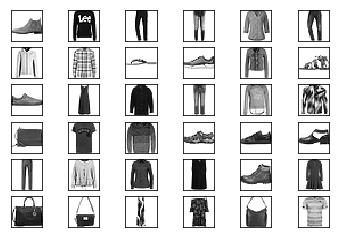

In [6]:
for i in range(36):
    p1 = plt.subplot(6,6,i+1)
    plt.imshow(X_test[i],cmap=plt.cm.binary)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False);

### Normalizing the data

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0
# keras.utils.normalize(X_train,axis=1)
# keras.utils.normalize(X_test,axis=1)

### MODEL 1:Creating Model (Neural Network with one hidden layer)

In [8]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

### Training the model

In [9]:
model.fit(X_train,y_train,epochs=5,batch_size=30)

Epoch 1/5
60000/60000 [==============================] - 12s 201us/step - loss: 0.4990 - acc: 0.8261
Epoch 2/5
60000/60000 [==============================] - 11s 175us/step - loss: 0.3745 - acc: 0.8642
Epoch 3/5
60000/60000 [==============================] - 13s 213us/step - loss: 0.3381 - acc: 0.8763
Epoch 4/5
60000/60000 [==============================] - 13s 209us/step - loss: 0.3135 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 13s 211us/step - loss: 0.2962 - acc: 0.8909


### Evaluating how model performs on testing set

In [10]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 86us/step


[0.34099853444099426, 0.8801]

### Prediction And Deployment

In [11]:
predictions = model.predict([X_test])

In [12]:
for i in range(10):
    print("Item :",i+1)
    print("Your Prediction : ",classes[np.argmax(predictions[i])],"\nYour Actual Product : ",classes[y_test[i]])

Item : 1
Your Prediction :  Ankle boot 
Your Actual Product :  Ankle boot
Item : 2
Your Prediction :  Pullover 
Your Actual Product :  Pullover
Item : 3
Your Prediction :  Trouser 
Your Actual Product :  Trouser
Item : 4
Your Prediction :  Trouser 
Your Actual Product :  Trouser
Item : 5
Your Prediction :  Shirt 
Your Actual Product :  Shirt
Item : 6
Your Prediction :  Trouser 
Your Actual Product :  Trouser
Item : 7
Your Prediction :  Coat 
Your Actual Product :  Coat
Item : 8
Your Prediction :  Shirt 
Your Actual Product :  Shirt
Item : 9
Your Prediction :  Sandal 
Your Actual Product :  Sandal
Item : 10
Your Prediction :  Sneaker 
Your Actual Product :  Sneaker


### Visualizing the score of our predictions

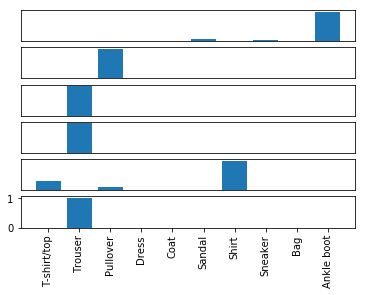

In [13]:
for i in range(6):
    plt.subplot(6,1,i+1)
    plt.bar(range(10),predictions[i])
    if i != 5:
        plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False);
plt.xticks(range(10),classes,rotation=90);

### MODEL 2: Creating Model(CNN)

In [14]:
X_train = X_train.reshape(-1,28,28,1)    # Resizing the input to volume as CNN takes input as volume
X_test = X_test.reshape(-1,28,28,1)
model1 = Sequential()
model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPooling2D(2,2))

model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPooling2D(2,2))

model1.add(Flatten())

model1.add(Dense(128))
model1.add(Activation('relu'))

model1.add(Dense(10))
model1.add(Activation('softmax'))

model1.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

In [15]:
model1.fit(X_train,y_train,epochs=5,batch_size=30)

Epoch 1/5
60000/60000 [==============================] - 27s 455us/step - loss: 0.4325 - acc: 0.8426
Epoch 2/5
60000/60000 [==============================] - 25s 412us/step - loss: 0.2894 - acc: 0.8923
Epoch 3/5
60000/60000 [==============================] - 25s 413us/step - loss: 0.2453 - acc: 0.9090
Epoch 4/5
60000/60000 [==============================] - 25s 414us/step - loss: 0.2126 - acc: 0.9212
Epoch 5/5
60000/60000 [==============================] - 25s 413us/step - loss: 0.1864 - acc: 0.9304


### Evaluating how model performs on testing set

In [16]:
model1.evaluate(X_test,y_test)

10000/10000 [==============================] - 2s 163us/step


[0.27781598265171054, 0.9013]

### Summery of our Models

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
__________